# 📄 Generating plot demonstrating $\mathbf{X}$ versus $\mathbf{X}_S$ manifolds (**Figure 1**)

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
scaling = 'level'
n_components = 2
sample_percentage = 100

In [3]:
data_tag = 'lightweight-flamelet-CO-H2-10-1'
%run -i load-SLFM-data.py

Removing N2.

The data set has 9800 observations.

Using: T, H2, O2, OH, H2O, CO, CO2 as target variables.


In [4]:
pca = reduction.PCA(state_space, scaling=scaling, n_components=n_components)
PCs = pca.transform(state_space)
PC_sources = pca.transform(state_space_sources, nocenter=True)
(PCs, _, _) = preprocess.center_scale(PCs, '-1to1')

In [5]:
subset = [8, 2, 1, 6, 4, 9, 0]
print(state_space_names[subset])

subset_pca = reduction.PCA(state_space[:,subset], scaling=scaling, n_components=n_components)
subset_PCs = subset_pca.transform(state_space[:,subset])
subset_PC_sources = subset_pca.transform(state_space_sources[:,subset], nocenter=True)
(subset_PCs, _, _) = preprocess.center_scale(subset_PCs, '-1to1')

['CO' 'O2' 'H2' 'H' 'OH' 'CO2' 'T']


***

## ✏️ Plot

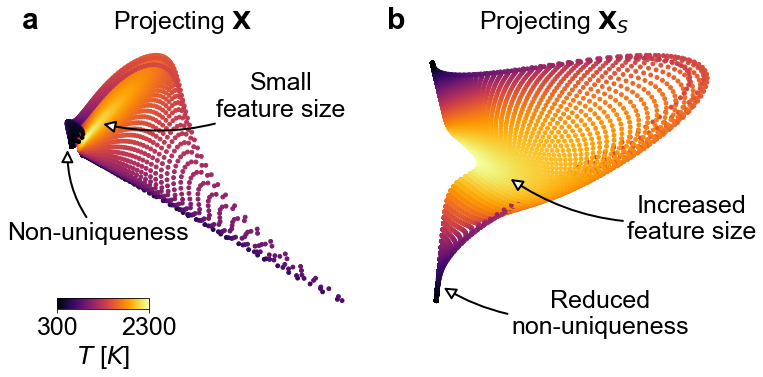

In [6]:
figure = plt.figure(figsize=(12, 5))
spec = figure.add_gridspec(ncols=2, nrows=1, width_ratios=[1, 1], height_ratios=[1])

point_size = 15

figure_a = figure.add_subplot(spec[0,0:1])
scat_a = figure_a.scatter(-PCs[:,0], PCs[:,1], c=state_space[:,0], s=point_size, cmap='inferno')
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.text(-0.1,1.05,'a', **hfont, fontsize=30, transform=figure_a.transAxes)
plt.text(0.2, 1.05, 'Projecting $\mathbf{X}$', fontsize=25, transform=figure_a.transAxes)
ann = plt.annotate("Non-uniqueness",
                  xy=(0.05, 0.61), xycoords='axes fraction',
                  xytext=(0.15, 0.3), textcoords='axes fraction',
                  size=25, va="center", ha="center",
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w", lw=2),)
ann = plt.annotate("Small\nfeature size",
                  xy=(0.16, 0.7), xycoords='axes fraction',
                  xytext=(0.75, 0.8), textcoords='axes fraction',
                  size=25, va="center", ha="center",
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w", lw=2),)
cbaxes = inset_axes(figure_a, width="30%", height="4%", loc='lower left')
cbar = plt.colorbar(scat_a, ticks=[300,2300], orientation='horizontal', aspect=8, cax=cbaxes)
cbar.ax.set_xlabel('$T$ [$K$]', fontsize=25, rotation=0)
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(25)
        
figure_b = figure.add_subplot(spec[0,1:2])
scat_b = figure_b.scatter(subset_PCs[:,0], subset_PCs[:,1], c=state_space[:,0], s=point_size, cmap='inferno')
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.text(-0.1,1.05,'b', **hfont, fontsize=30, transform=figure_b.transAxes)
plt.text(0.2, 1.05, 'Projecting $\mathbf{X}_S$', fontsize=25, transform=figure_b.transAxes)
ann = plt.annotate("Reduced\nnon-uniqueness",
                  xy=(0.08, 0.1), xycoords='axes fraction',
                  xytext=(0.6, 0), textcoords='axes fraction',
                  size=25, va="center", ha="center",
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w", lw=2),)
ann = plt.annotate("Increased\nfeature size",
                  xy=(0.3, 0.5), xycoords='axes fraction',
                  xytext=(0.9, 0.35), textcoords='axes fraction',
                  size=25, va="center", ha="center",
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w", lw=2),)

plt.savefig('../figures/Figure-1.png', dpi=200, bbox_inches='tight')

***

## Compute costs for the two manifolds

In [7]:
tic = time.perf_counter()

variance_data = analysis.compute_normalized_variance(PCs,
                                                     state_space[:,0:1],
                                                     depvar_names=['T'],
                                                     scale_unit_box=False,
                                                     bandwidth_values=bandwidth_values)

cost = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                             penalty_function='log-sigma-over-peak',
                                                             norm=None,
                                                             integrate_to_peak=False)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.8 minutes.
----------------------------------------


In [8]:
print(cost)

[2.280382462191226]


In [9]:
tic = time.perf_counter()

variance_data = analysis.compute_normalized_variance(subset_PCs,
                                                     state_space[:,0:1],
                                                     depvar_names=['T'],
                                                     scale_unit_box=False,
                                                     bandwidth_values=bandwidth_values)

cost = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                             penalty_function='log-sigma-over-peak', 
                                                             norm=None, 
                                                             integrate_to_peak=False)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.9 minutes.
----------------------------------------


In [10]:
print(cost)

[1.1069980923852365]


***